**Import necessary libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

**Load the dataset**

In [ ]:
# Assuming the dataset is in a CSV file named 'PlayTennis.csv'
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Social_Network_Ads (1).csv')

**Dataset Visualization**

In [ ]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.shape

(400, 5)

**EDA**

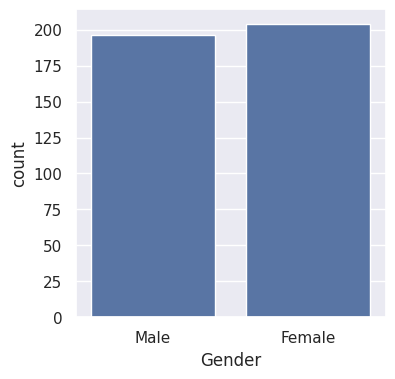

In [ ]:
ax = plt.subplots(figsize = (4,4))
ax = sns.countplot(x=df['Gender'])
plt.show()

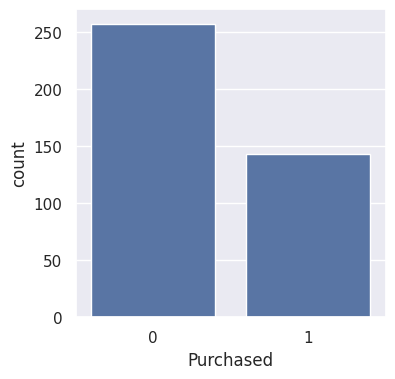

In [ ]:
ax = plt.subplots(figsize = (4,4))
ax = sns.countplot(x=df['Purchased'])
plt.show()

**Feature Extraction**

In [ ]:
# Separate features (X) and target variable (y)
X = df.iloc[:, [1, 2, 3]].values  # Considering Gender, Age, and Estimated Salary as features
y = df.iloc[:, 4].values  # Assuming 'Purchased' is the target variable

**Use LabelEncoder for 'Gender' as 'Gender' is non-numeric**

In [ ]:
label_encoder = LabelEncoder()
X[:, 0] = label_encoder.fit_transform(X[:, 0])

**Split the dataset into training and testing sets**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Create a Random Forest classifier**

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=1000)

**Fit the model to the training data**

In [ ]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

**Make predictions on the test set**

In [ ]:
y_pred = rf_classifier.predict(X_test)

**Evaluate the performance of the classifier**

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

**Print the results**

RF Accuracy: 0.9125
RF Confusion Matrix:
[[47  5]
 [ 3 25]]
RF Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92        52
           1       0.83      0.89      0.86        28

    accuracy                           0.90        80
   macro avg       0.89      0.90      0.89        80
weighted avg       0.90      0.90      0.90        80



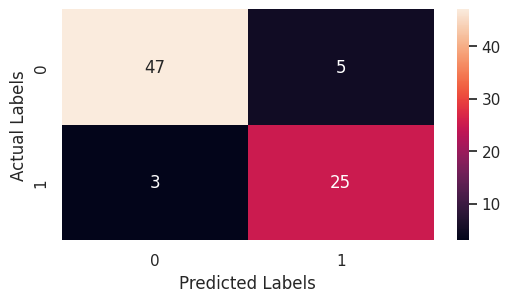

In [ ]:
print(f'RF Accuracy: {accuracy}')
print(f'RF Confusion Matrix:\n{conf_matrix}')
sns.set(rc={'figure.figsize':(6,3)})
sns.heatmap(confusion_matrix(y_test,y_pred),annot = True,fmt = 'd')
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
print(f'RF Classification Report:\n{classification_report_str}')

**Predict whether a targeted audience or person will purchase the product or not**

In [ ]:
# Assuming we have a new set of feature values for prediction
new_data = np.array([[0, 30, 50000]])  # Example: Gender (0 for Female, 1 for Male), Age, Estimated Salary

# Use the trained RF model to make predictions
predicted_purchase = rf_classifier.predict(new_data)

# Print the predicted outcome
if predicted_purchase[0] == 1:
    print("The targeted audience is predicted to purchase the product.")
else:
    print("The targeted audience is predicted not to purchase the product.")

The targeted audience is predicted not to purchase the product.


**Output Visualization using Bar Plot**

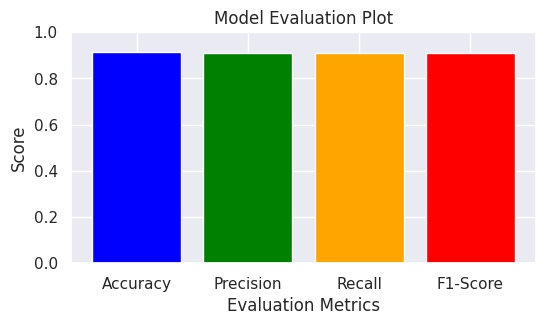

In [ ]:
# Assuming we have already evaluated the model and obtained these metrics, hence plotting the same in a bar plot
accuracy = 0.9125
precision = 0.91
recall = 0.91
f1_score = 0.91

# Plotting the bar plot
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
metrics_values = [accuracy, precision, recall, f1_score]

plt.bar(metrics_names, metrics_values, color=['blue', 'green', 'orange', 'red'])
plt.ylim([0, 1])  # Set the y-axis limit between 0 and 1
plt.title('Model Evaluation Plot')
plt.xlabel('Evaluation Metrics')
plt.ylabel('Score')
plt.show()

**10-fold Cross-Validation**

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer

# Define stratified 10-fold cross-validation
cross_val = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Define accuracy as the evaluation metric
scoring = make_scorer(accuracy_score)

# Perform cross-validation on RF
cv_results = cross_val_score(rf_classifier, X, y, cv=cross_val, scoring=scoring)

# Display results
print("Cross-Validation Results:")
print("Individual Accuracies:", cv_results)
print("Average Accuracy:", np.mean(cv_results))

Cross-Validation Results:
Individual Accuracies: [0.875 0.9   0.975 0.95  0.9   0.825 0.8   0.925 0.925 0.875]
Average Accuracy: 0.8950000000000001


**Cross-Validation Result Visualization using Bar Plot**

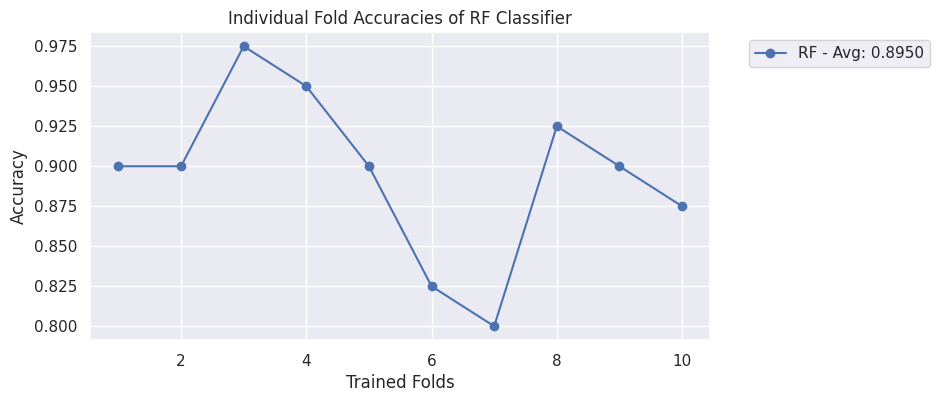

In [ ]:
# Cross-Validation Result
model = ['RF']
accuracies = {
    'RF': [0.9, 0.9, 0.975, 0.95, 0.9, 0.825, 0.8, 0.925, 0.9, 0.875],
}

# Plotting
plt.figure(figsize=(8, 4))

for model in model:
    plt.plot(range(1, 11), accuracies[model], marker='o', label=f'{model} - Avg: {sum(accuracies[model])/10:.4f}')

plt.title('Individual Fold Accuracies of RF Classifier')
plt.xlabel('Trained Folds')
plt.ylabel('Accuracy')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Placing the legend outside the plot area
plt.show()

**ROC Curve Plotting for the above RF Model**

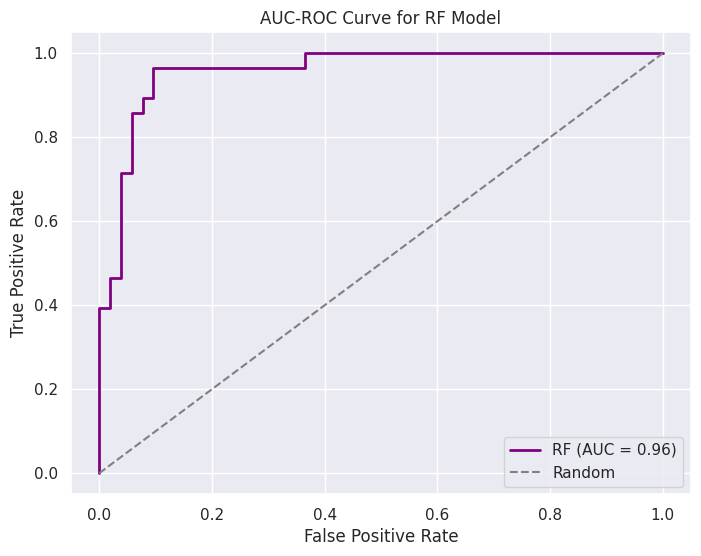

In [ ]:
from sklearn.metrics import roc_curve, auc

# Assuming y_test is the actual labels
label_encoder = LabelEncoder()
y_test_binary = label_encoder.fit_transform(y_test)

# Get predicted probabilities for the positive class
rf_predicted_scores = rf_classifier.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC for RF model
rf_fpr, rf_tpr, _ = roc_curve(y_test_binary, rf_predicted_scores)

# Compute AUC for RF model
rf_roc_auc = auc(rf_fpr, rf_tpr)

# Plot ROC curve for RF model
plt.figure(figsize=(8, 6))
sns.set(style='darkgrid')

plt.plot(rf_fpr, rf_tpr, color='purple', lw=2, label=f'RF (AUC = {rf_roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve for RF Model')
plt.legend(loc='lower right')
plt.show()